<a href="https://colab.research.google.com/github/priyadarshani17/Bike-shearing-demand-predication-ML-regression-project/blob/main/Bike_Sharing_Demand_Prediction_capstone_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPSTONE - BIKE SHARING DEMAND PREDICTION**
*This project will be performed with the help of Supervised Linear Regression model. We will be performing basic check on the data for any errors followed by EDA and at last we will train our Machine Learning model on the data to predict outputs for new inputs provided.*


  


# **PROBLEM STATEMENT**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **UNDERSTANDING THE PROBLEM FROM A BUSINESS PRESPECTIVE.**

### *Why this business is progressing fast?*
1. Revenue in the Bike-sharing segment is projected to reach US$7.96bn in 2022.
2. In the Bike-sharing segment, the number of users is expected to amount to 930.3m users by 2026.
3. User penetration is 10.0% in 2022 and is expected to hit 11.8% by 2026.
4. Bike sharing business has a profit margin of almost 60%.
5. Bike sharing business is eco-friendly way of commute and so it attracts more customers.
6. Bike sharing businesses are also purpose-driven businesses in a way, as they help the environment to reduce its carbon footprint and air pollution.


### *Understanding the problem.*
1. As a business, our first priority is to benefit and serve our customers with the best service and no delay in service.
2. To avoid a bike shortage for our customers and to save their time, we need to be prepared beforehand. For that, we have to use our past data for predictions.
3. We can benefit our business by predicting how many bikes could be needed at a specified time, by just taking a look at the temperature, time, day, weather and many other things.
4. We can predict our revenue, profits and operation cost by predicting the total number of bikes that could be rented on a day.


# **INTRODUCTION**


*We have been provided with the bike rental demand data of 2017 December to November 2018 (1 year total), in order to perform supervised liner regression and identify the relationships between different variables. The data includes information on the number of bike rentals, the weather conditions, and the day of the week. The goal is to use this data to predict the demand for bike rentals in the future.*

 

# **FEATURE'S DESCRIPTION**


**Date** - Date on which the bike was rented(year-month-day).

**Rented Bike count** - Number of bikes rented in that hour.

**Hour** - Hour of the day.

**Temperature** -Temperature at that time (Celsius).

**Humidity** - Percentage of humidity in air (%).

**Windspeed** - Speed of the wind (m/s).

**Visibility** - How far is the visibility (*10m).

**Dew point temperature** - The dew point is the temperature the air needs to be cooled at constant pressure to in order to achieve a relative humidityof 100% (°C).

**Solar radiation** - Solar radiation is the energy recieved on an area on earth from the Sun (MJ/m²).

**Rainfall** - Measure of Rainfall (mm).

**Snowfall** - Measure of Snowfall (cm).

**Seasons** - which season is bike rented (Winter, Spring, Summer, Autumn).

**Holiday** - Was it a holiday or not (Holiday/No holiday).

**Functional Day** - Was it a Functional day or not.(Yes/No).


# **INITIALIZING**

## Importing Libraries and Modules.

In [ ]:
import pandas as pd

import numpy as np
from numpy import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, MultiLabelBinarizer, StandardScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV

from sklearn import metrics

from sklearn.metrics import r2_score, log_loss, mean_squared_error, accuracy_score, mean_absolute_error

from sklearn.pipeline import make_pipeline

from scipy.stats import skew

pd.options.mode.chained_assignment = None  # default='warn'

from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Adding Dataset.

In [ ]:
# Adding Data set throught link.
url = "https://drive.google.com/file/d/1dZ7p614gC_iwxHwcj-1N0Lc155AGMTJS/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

# Naming our dataset
df =  pd.read_csv(url,  encoding= 'unicode_escape')


In [ ]:
# Creating a copy, for working on it without harming the orignal dataset.
bike_df = df.copy()


# **DATA OVERVIEW**

In [ ]:
# checking top 5 Rows or instances.
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# checking last 5 Rows or instances.
bike_df.tail()      

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# checking total rows and columns ( Rows, Columns).
bike_df.shape

(8760, 14)

Some insights:-
1.  We have 8760 instances and 14 features.

In [ ]:
# checking basic information of all columns such as datatype, total number null values present, memory usage etc.
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Some insights:-
1. We do not have any null values present in any column
2. We have 4 columns which have object data type. others are either float64 or int64.

In [ ]:
# checking description of all data types columns.
bike_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [ ]:
# Checking for unique values in each column
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

Some insights:-
1. By looking at Rented Bike Count,we get mean is more than median. so there can be outliers.

# **CLEANING THE DATASET**


## Null values check




In [ ]:
# Cheking for null values 
bike_df.isna().sum(axis = 0)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

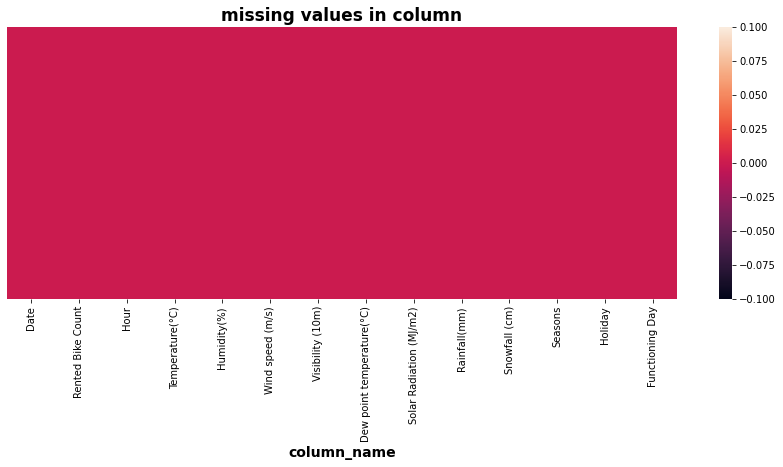

In [ ]:
# Checking missing values
plt.figure(figsize=(15, 5))
sns.heatmap(bike_df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

Some insights:-
1. There exists no null values.

## Duplicate values check

In [ ]:
# Checking for duplicate values
len(df[bike_df.duplicated()])

0

Some insights:-
1. There are no duplicate instances.

In [ ]:
bike_df.shape[0]

8760

# **DATA PREPRATION FOR EDA**

## 1. Renaming all Columns

In [ ]:
#Rename the complex columns name
bike_df=bike_df.rename(columns={'Date' : 'date',
                                'Rented Bike Count':'rented_bike_count',
                                'Hour' : 'hour',
                                'Seasons': 'season',
                                'Holiday': 'holiday',
                                'Temperature(°C)':'temperature',
                                'Humidity(%)':'humidity',
                                'Wind speed (m/s)':'wind_speed',
                                'Visibility (10m)':'visibility',
                                'Dew point temperature(°C)':'dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'solar_radiation',
                                'Rainfall(mm)':'rainfall',
                                'Snowfall (cm)':'snowfall',
                                'Functioning Day':'functioning_day'})

## 2. Creating New columns for Day, Day of week, Month and Year.

In [ ]:
# converting the date time column into DateTime format for further usage
bike_df['date'] = pd.to_datetime(bike_df['date'], format="%d/%m/%Y")

# Creating 4 new columns - Year, Month , Day , Day of week.
bike_df['year'] = bike_df['date'].dt.year
bike_df['month'] = bike_df['date'].dt.month_name()
bike_df['day'] = bike_df['date'].dt.day
bike_df['day_of_week'] = bike_df['date'].dt.day_name()


## 3. Creating New columns for weekdays and weekend.

In [ ]:
# We are creating a new column is_weekend which contains 1 if yes(saturday/sunday) else it contains 0 to represent weekdays
bike_df['weekend_or_not']=bike_df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

# this column will state it as weekday or weekend, we will use it just for EDA
bike_df['weekendvsWeekday']=bike_df['day_of_week'].apply(lambda x : 'weekends' if x=='Saturday' or x=='Sunday' else 'weekdays' )


# **EDA**

In [ ]:
bike_df.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,season,holiday,functioning_day,year,month,day,day_of_week,weekend_or_not,weekendvsWeekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,1,Friday,0,weekdays
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,1,Friday,0,weekdays
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,1,Friday,0,weekdays
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,1,Friday,0,weekdays
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,1,Friday,0,weekdays


## Ckecking for outliers

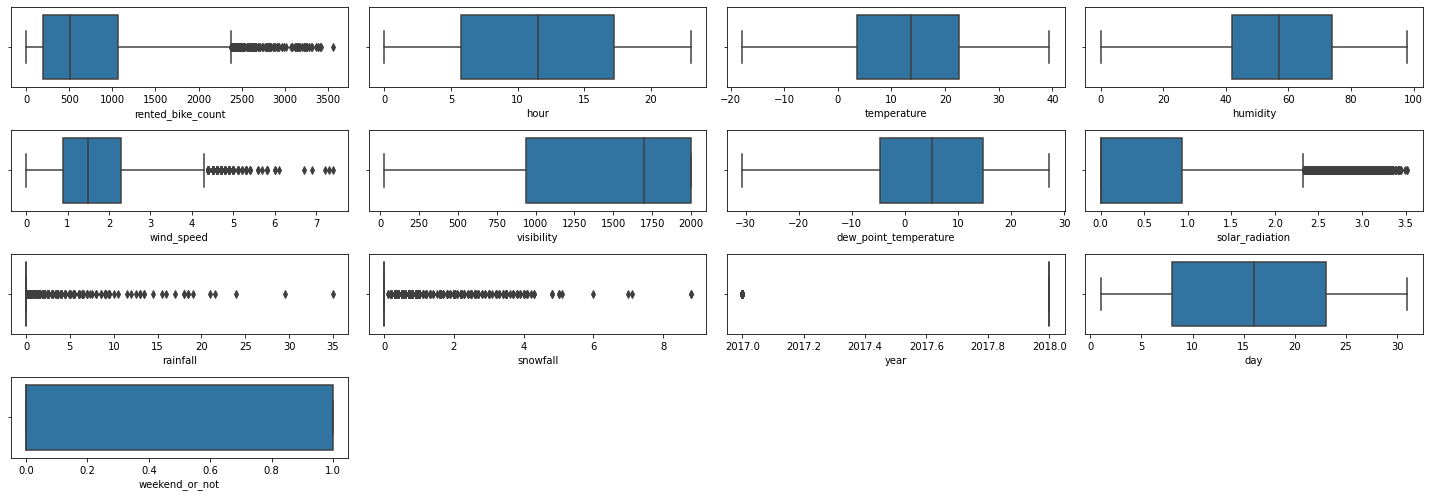

In [ ]:
# Importing warning
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in bike_df.describe().columns:
    plt.subplot(6,4,num_it)
    sns.boxplot(bike_df[col])
    num_it+=1
    
plt.tight_layout()

Some Insights:-
1. Rented Bike count contains outliers. Wind Speed, Solar Radiation, Rainfall, and Snowfall contains outliers which wont be a problem

## 1. Histogram for all columns

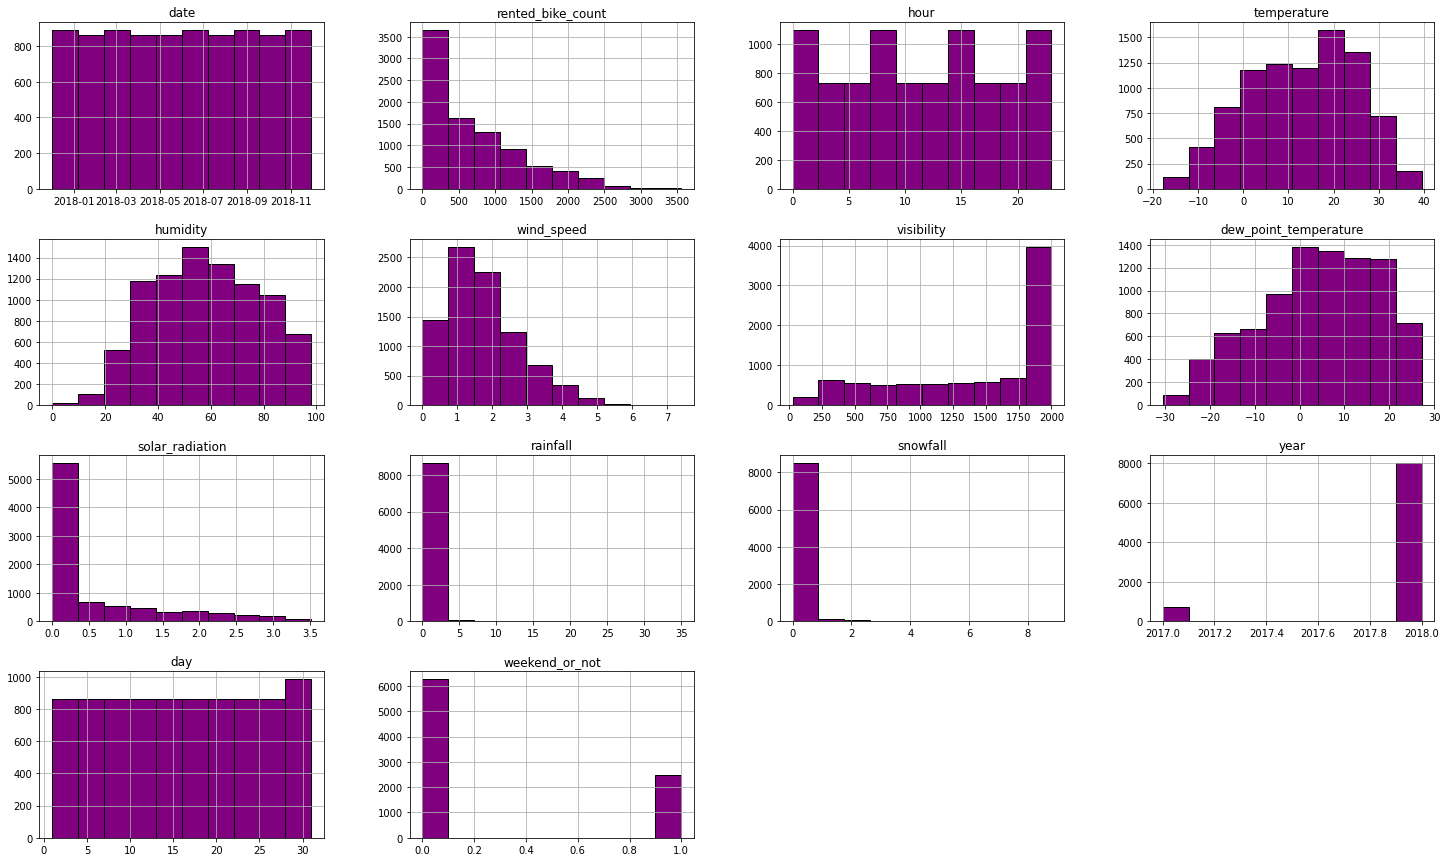

In [ ]:
# it shows the value distribution in each columns
bike_df.hist(figsize=(25,15),color = "purple", ec="black")
plt.show()

## 2. Correlation between all features.

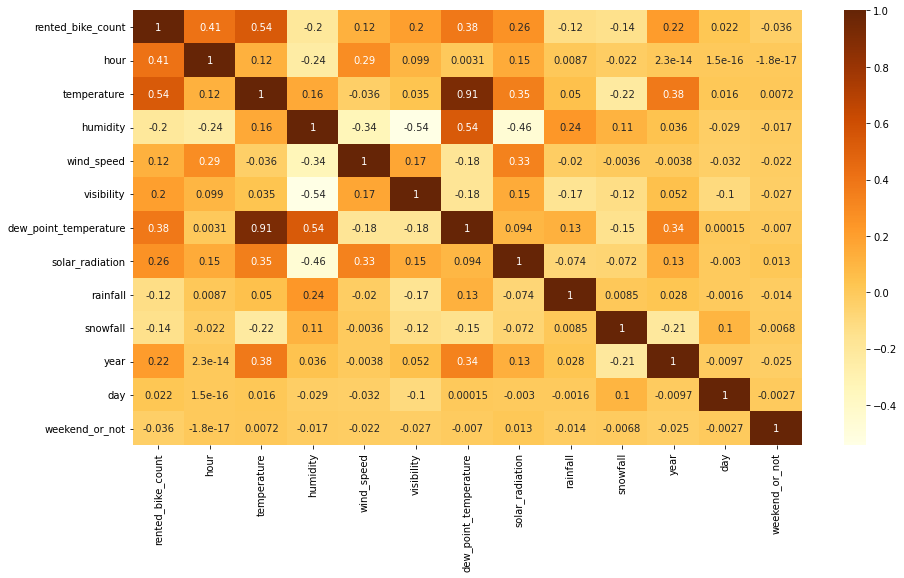

In [ ]:
# Printing correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(bike_df.corr(),annot=True,cmap="YlOrBr")

plt.show()

Some insights:-
1. Day Hour is highly correlated to Number of bike rented, as the hour increase number of bikes rented alos increase.
2. Temperature, dew point and Bike rented count are highly correlated, as temperature and dewpoint increases , bike rented count increase
3. Temperature and solar radiation are correlated.
4. Wind speed and hour are correlated, as hours increase ina day wind speed also goes up.
5. Temperature and dew point are extremely correlated.
6. Visibility, solar radiationand Humidity are negatively correlated, as humidity increases, solar radiation and visibility decreases.
7. wind speed, solar radiation and visibility are positively correlated. 
8. Humidity and rainfall are positively correlated, more the rainfall more is the humidity and more the dew point


We can say that ***bike rented count*** is positively correlated to these top 6 
features in Decending order.
1. Temperature..........................- (0.54)
3. Hour........................................- (0.41)
3. Dew Point Temperature.........- (0.38)
4. Solar Radiation.......................- (0.26)
5. Visibility...................................- (0.20)
6. Win speed................................- (0.12)




## 3. Does weekend has more rented bike count or weekdays?

,rented_bike_count
weekendvsWeekday,
weekdays,4506628
weekends,1665686


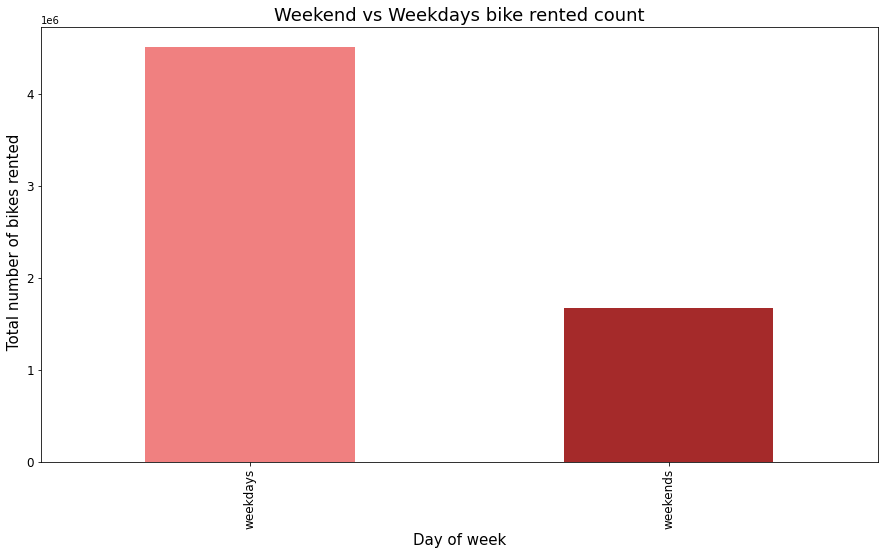

In [ ]:
# plotting graph to compare total number of bike rented on weekdays vs weekends.

weeks=bike_df.groupby('weekendvsWeekday').sum()
weeks['rented_bike_count'].plot(kind='bar',figsize=(15,8) , color=['lightcoral','brown'], fontsize= 12)
plt.title('Weekend vs Weekdays bike rented count',fontsize=18)
plt.xlabel("Day of week", fontsize= 15)
plt.ylabel(" Total number of bikes rented", fontsize= 15)

# Printing values
weeks[weeks.columns[0:1]]


Some insights:-
1. We have more bookings on weekdays combined vs weekend 



## 4. Which one has more bike rented counts: weekend or weekdays?

,rented_bike_count
weekendvsWeekday,
weekdays,901325
weekends,832843


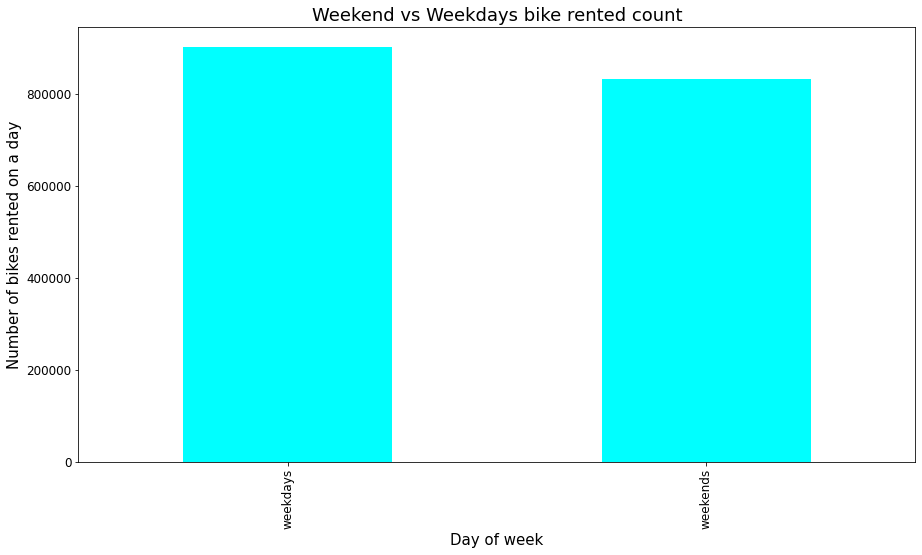

In [ ]:
# Taking number of bike rented count for weedays and weekend 
weeksavg=bike_df.groupby('weekendvsWeekday').sum()

# Now taking mean of bike rented for a day weekend and weekdays

weeksavg['rented_bike_count'][0]= weeksavg['rented_bike_count'][0]*(1/5)
weeksavg['rented_bike_count'][1]= weeksavg['rented_bike_count'][1]*(1/2)

# Plotting the graph
weeksavg['rented_bike_count'].plot(kind='bar',figsize=(15,8), color= 'cyan' , fontsize=12)
plt.title('Weekend vs Weekdays bike rented count',fontsize=18)
plt.xlabel("Day of week", fontsize= 15)
plt.ylabel("Number of bikes rented on a day", fontsize= 15)

# Printing average number bike rented on weekdays and weekend
weeksavg[weeksavg.columns[0:1]]




Some insights:- 
1. On Weekdays on average 901325 bikes are rented
2. On Weekends on average 832843 bikes are rented


## 5. Average Bike Rented Count every Month

In [ ]:
# Creating data set which has all features grouped by accordind to month
month_eda=bike_df.groupby('month').sum()
month_eda= month_eda.reset_index()

month_eda[month_eda.columns[0:2]]

,month,rented_bike_count
0,April,524227
1,August,651887
2,December,185330
3,February,151833
4,January,150006
5,July,734460
6,June,896887
7,March,380594
8,May,707088
9,November,465715


Text(0, 0.5, 'Number of Rented bikes per day')

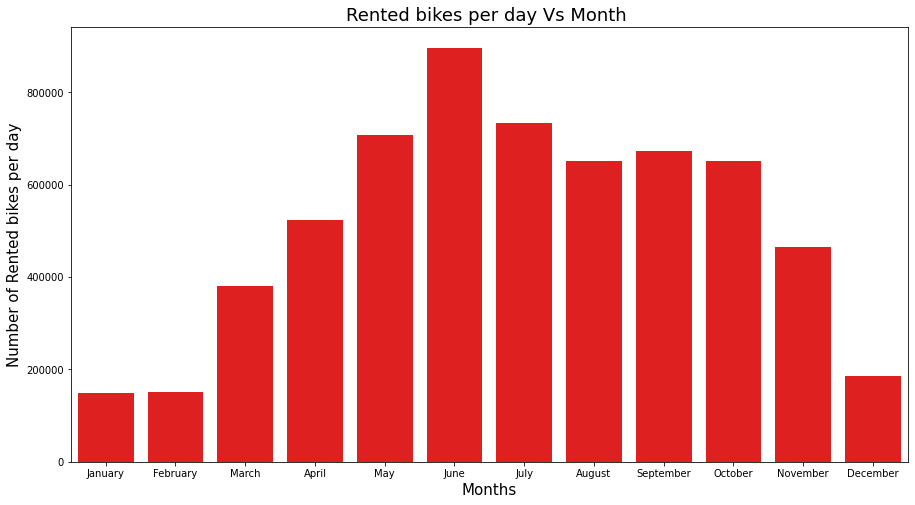

In [ ]:
# plotting graph to get monthly total number of bike rented 
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot( data=month_eda, x='month', y='rented_bike_count' ,color = 'red', hue_order='blue', ci=None, order=['January','February','March','April','May','June','July','August','September','October','November','December'])
ax.set_title('Rented bikes per day Vs Month ' , fontsize=18)
ax.set_xlabel('Months',fontsize=15)
ax.set_ylabel('Number of Rented bikes per day',fontsize=15)

Some insights:-
1. Top 3 months where most bikes were rented are June, July and May.
2. Peak periods when maximum bikes were rented is from May to October.
3. The month in which least bikes were rented is January(150006) followed by  February(151833) and December(185330).
   


## 6. Bike Rented Hour Wise.

,rented_bike_count
hour,
0,197633
1,155557
2,110095
3,74216
4,48396
5,50765
6,104961
7,221192
8,370731


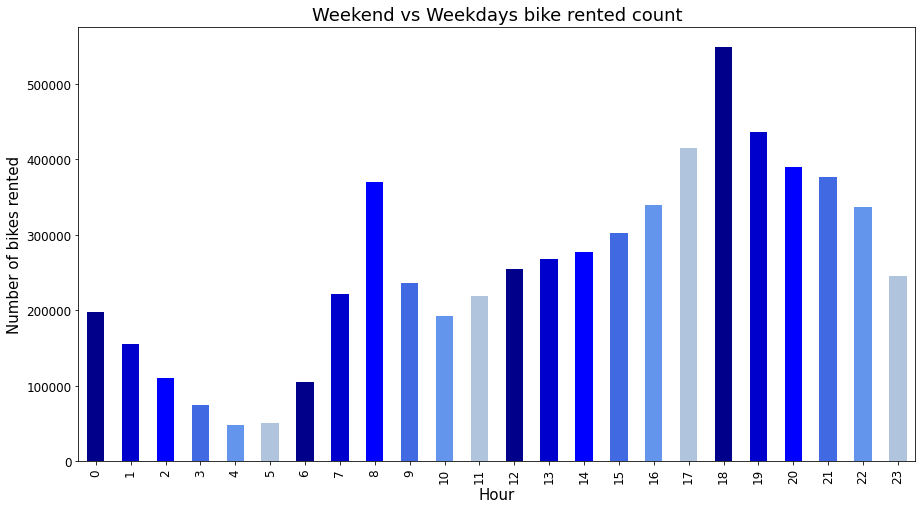

In [ ]:
# Creating data set which has all features grouped by accordind to hour

hour_eda=bike_df.groupby('hour').sum()

# Plotting graph
hour_eda['rented_bike_count'].plot(kind='bar',figsize=(15,8) ,fontsize=12, color=['darkblue','mediumblue', 'blue', 'royalblue', 'cornflowerblue', 'lightsteelblue'])
plt.title('Weekend vs Weekdays bike rented count',fontsize=18)
plt.xlabel("Hour", fontsize= 15)
plt.ylabel("Number of bikes rented", fontsize= 15)

hour_eda[hour_eda.columns[0:1]]

Some insights:-
1. Maximum number of bikes rented on average is in the 18th hour followed by 19th hour and 17th hour.
2. Peak period for bike rented count is from15th hour to 22nd hour, there is a slight increment in the 8th hour also.
3. Minimum bikes were rented in 4th and 5th hour.

## 7. How many bikes were rented on non-functioning day vs functioning day.

,rented_bike_count
functioning_day,
No,0
Yes,6172314


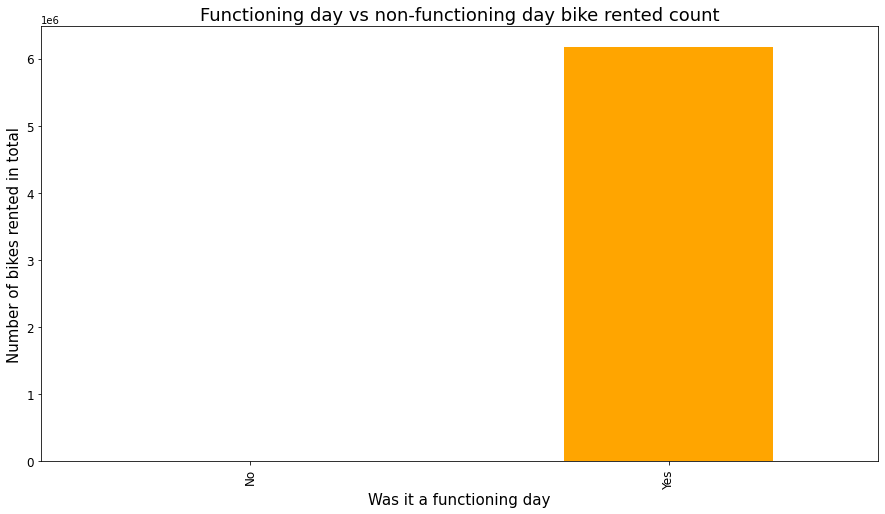

In [ ]:
# Creating data set which has all features grouped by accordind to functioning day

func_eda=bike_df.groupby('functioning_day').sum()

# Plotting graph
func_eda['rented_bike_count'].plot(kind='bar',figsize=(15,8) , color=['orange'], fontsize= 12)
plt.title('Functioning day vs non-functioning day bike rented count',fontsize=18)
plt.xlabel("Was it a functioning day",fontsize= 15)
plt.ylabel("Number of bikes rented in total", fontsize= 15)


func_eda[func_eda.columns[0:1]]

Some insights:-
1. We can see that no bikes were rented on Non-functioning day

## 8. Season wise bike rent count

,season,rented_bike_count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


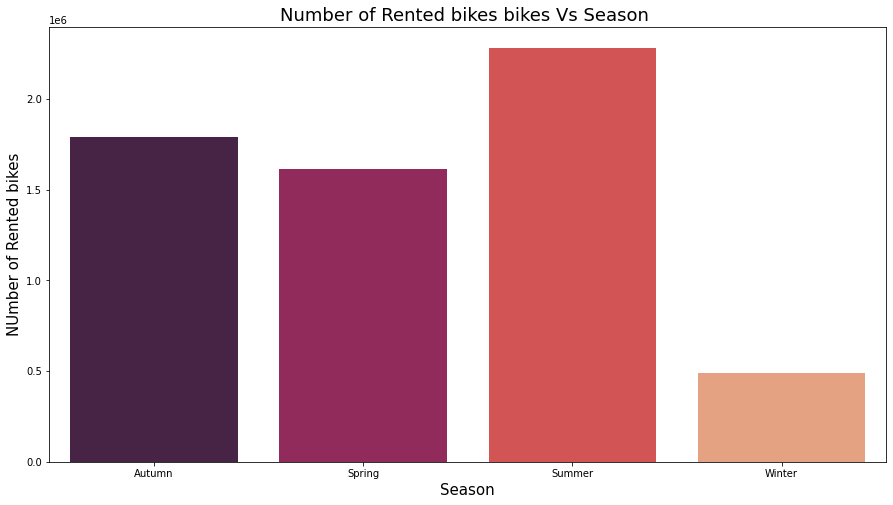

In [ ]:
# Creating data set which has all features grouped by accordind to season
season_eda=bike_df.groupby('season').sum()
season_eda= season_eda.reset_index()

# plotting graph to get monthly total number of bike rented 
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot( data=season_eda, x='season', y='rented_bike_count' , ci=None, palette = "rocket")
ax.set_title('Number of Rented bikes bikes Vs Season ' , fontsize=18)
ax.set_xlabel('Season',fontsize=15)
ax.set_ylabel('NUmber of Rented bikes',fontsize=15)

season_eda[season_eda.columns[0:2]]

Some insights:-
1. We can see that there are very high demand for bike on rent in summer season , followed by autumn.
2. Least numbers of bike were rented in winter season, that maybe because of cold and snow.

## 9. Hour wise bike rent count for each season.

,hour,season,rented_bike_count
0,0,Autumn,56755
1,0,Spring,43298
2,0,Summer,82714
3,0,Winter,14866
4,1,Autumn,44200
...,...,...,...
91,22,Winter,20262
92,23,Autumn,67127
93,23,Spring,56066
94,23,Summer,106159


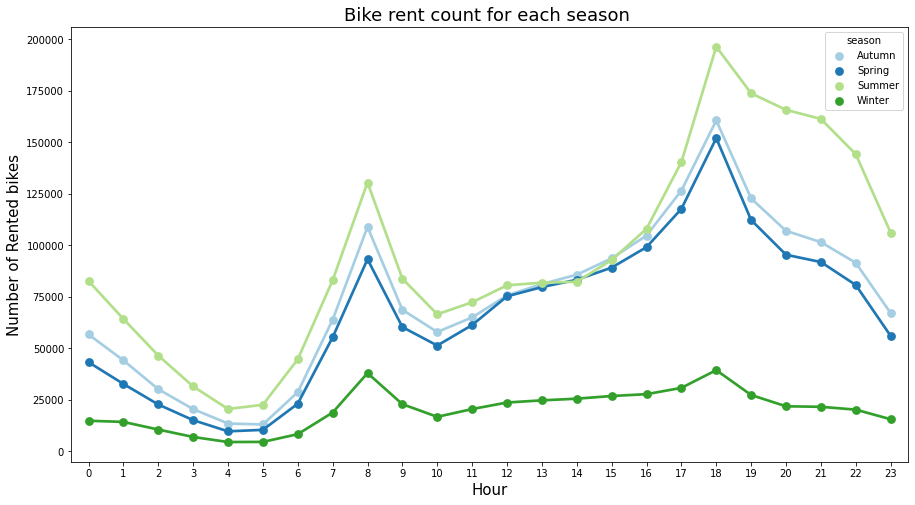

In [ ]:
# Creating data set which has all features grouped by accordind to season
season_hour_eda=bike_df.groupby(['hour','season']).sum()
season_hour_eda= season_hour_eda.reset_index()

# Plotting the data on graph
fig,ax=plt.subplots(figsize=(15,8))
sns.pointplot(data=season_hour_eda,x='hour',y='rented_bike_count',hue='season',palette = "Paired")
ax.set_title('Bike rent count for each season ' , fontsize=18)
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Rented bikes',fontsize=15)

season_hour_eda[season_hour_eda.columns[0:3]]

Some insights:-
1. In Summer(green), Peak is at 18th hour and least is at 4th and 5th hour, and it has highest number of rented bike
2. In Autumn(blue), Peak is at 18th hour and least is at 4th and 5th hour.
3. In Spring(yellow), Peak is at 18th hour and least is at 4th and 5th hour.
4. In winter(red), Peak is at 18th hour and least is at 4th and 5th hour, it has least number of bikes rented
5. We see almost similar trent in Autumn, Summer and Spring. There values are close to each other.


## 10. Snowfall affect on total bike rent count

,snowfall,rented_bike_count
0,0.0,6090314
1,0.1,205
2,0.2,3643
3,0.3,8304
4,0.4,5981


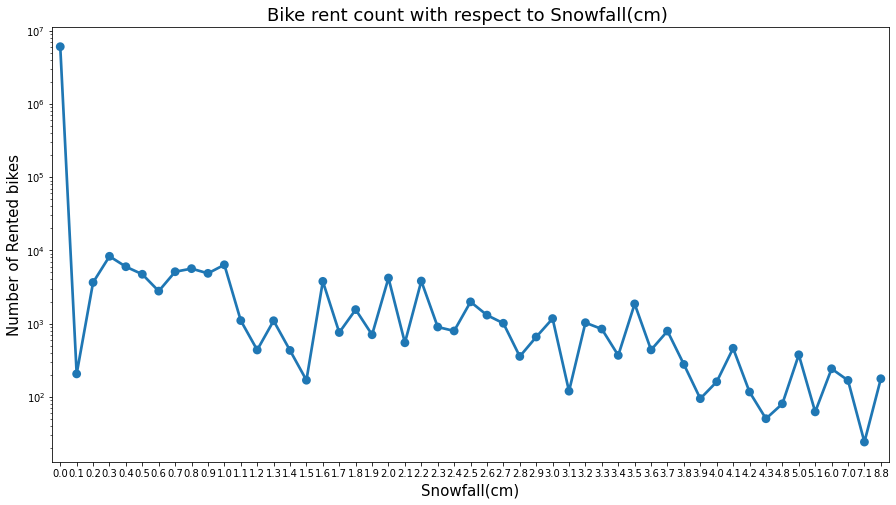

In [ ]:
# Creating data set which has all features grouped by accordind to Snowfall(cm)
snowfall_eda= bike_df.groupby(['snowfall' ]).sum()
snowfall_eda= snowfall_eda.reset_index()



# Plotting the data on Lograthmic graph
fig,ax=plt.subplots(figsize=(15,8))
sns.pointplot( data=snowfall_eda, x='snowfall',y='rented_bike_count',ax=ax  )
ax.set_yscale("log")
ax.set_title('Bike rent count with respect to Snowfall(cm) ' , fontsize=18)
ax.set_xlabel('Snowfall(cm)',fontsize=15)
ax.set_ylabel('Number of Rented bikes',fontsize=15)


# Printing top 5 data points which are in acending order.
snowfall_eda[snowfall_eda.columns[0:2]].head(5)


Some insights:-
1. Above graph is in Lograthmic Y-axis Scale.
2. As the Snowfall increases, the bike rent count decreases. 


## 11. Affect of Rainfall on Bike rent count.

,rainfall,rented_bike_count
0,0.0,6086009
1,0.1,15179
2,0.2,3706
3,0.3,1401
4,0.4,2147


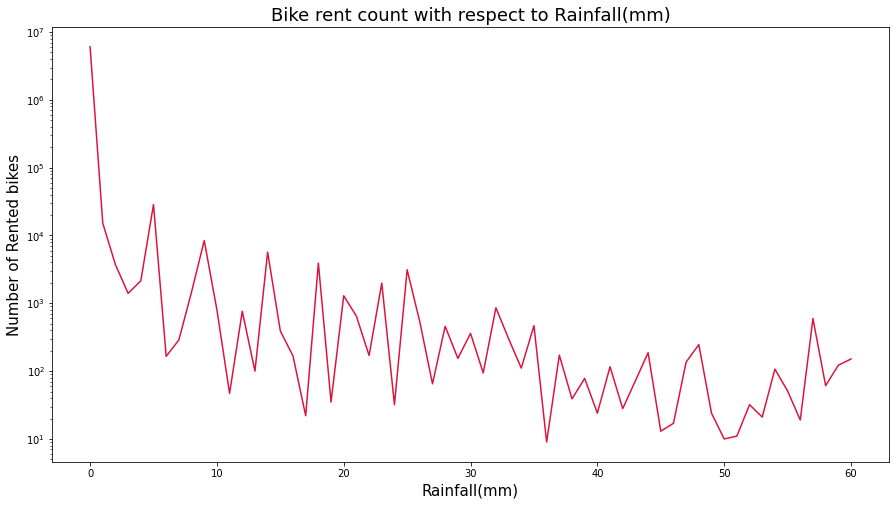

In [ ]:
# Creating data set which has all features grouped by accordind to Rainfall(mm)
rainfall_eda= bike_df.groupby(['rainfall']).sum()
rainfall_eda= rainfall_eda.reset_index()



# Plotting the data on Lograthmic graph
rainfall_eda['rented_bike_count'].plot(kind='line',figsize=(15,8) , color='crimson')
plt.title('Bike rent count with respect to Rainfall(mm)',fontsize=18)
plt.yscale("log")
plt.xlabel('Rainfall(mm)', fontsize= 15)
plt.ylabel('Number of Rented bikes', fontsize= 15)


# Printing top 5 data points which are in acending order.
rainfall_eda[rainfall_eda.columns[0:2]].head(5)


Some insights:-
1. Above graph is in Lograthmic Y-axis Scale.
2. As the Rainfall(mm) increases, the bike rent count decreases. 


## 12. Affect of Solar radiation on Bike rented count

,solar_radiation,rented_bike_count
0,0.00,2094379
1,0.01,100481
2,0.02,65643
3,0.03,58231
4,0.04,36019


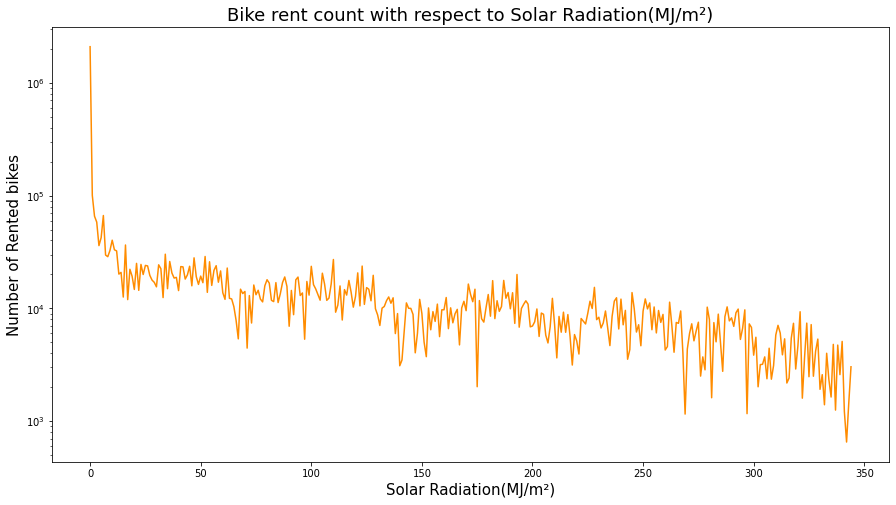

In [ ]:
# Creating data set which has all features grouped by accordind to Solar Radiation(MJ/m²)
solar_eda= bike_df.groupby(['solar_radiation']).sum()
solar_eda= solar_eda.reset_index()



# Plotting the data on Lograthmic graph

solar_eda['rented_bike_count'].plot(kind='line',figsize=(15,8) , color='darkorange')
plt.title('Bike rent count with respect to Solar Radiation(MJ/m²)',fontsize=18)
plt.yscale("log")
plt.xlabel('Solar Radiation(MJ/m²)', fontsize= 15)
plt.ylabel('Number of Rented bikes', fontsize= 15)



# Printing top 5 data points which are in acending order.
solar_eda[solar_eda.columns[0:2]].head(5)


Some insights:-
1. Above graph is in Lograthmic Y-axis Scale.
2. As the Solar Radiation(MJ/m²) increases, the bike rent count decreases rapidly(log scale). 

## 13. Bike Rent count with respect to temperature.


,rented_bike_count
temperature,
-17.8,322
-17.5,291
-17.4,64
-16.9,36
-16.5,96


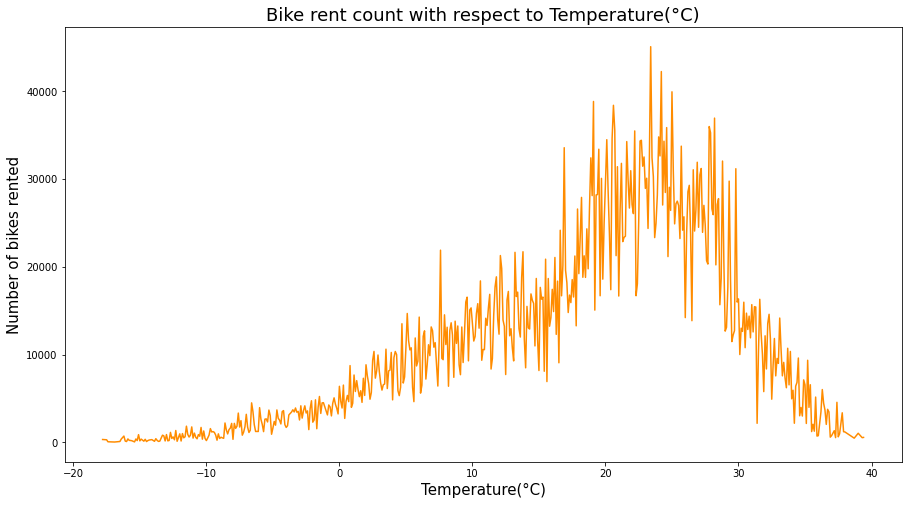

In [ ]:
# Creating data set which has all features grouped by accordind to Temperature
temp_eda= bike_df.groupby(['temperature' ]).sum()
# temp_eda= temp_eda.reset_index()

# Plotting graph
temp_eda['rented_bike_count'].plot(kind='line',figsize=(15,8) , color='darkorange')
plt.title('Bike rent count with respect to Temperature(°C)',fontsize=18)
plt.xlabel("Temperature(°C)", fontsize= 15)
plt.ylabel("Number of bikes rented", fontsize= 15)


# Printing top 5 data points which are in acending order.
temp_eda[temp_eda.columns[0:1]].head()


In [ ]:
# Temperature at which max bikes were rented.
temp_eda= temp_eda.reset_index()
max_temp_rent= temp_eda['temperature'][temp_eda['rented_bike_count'].argmax()]
min_temp_rent= temp_eda['temperature'][temp_eda['rented_bike_count'].argmin()]
print('Temperature at which maximum bikes were rented is: ',max_temp_rent  )
print('Temperature at which minimum bikes were rented is: ',min_temp_rent )

Temperature at which maximum bikes were rented is:  23.4
Temperature at which minimum bikes were rented is:  -16.9


Some insights:-
1. We can see only at an optimal temperature maximum number of bikes were rented.
2. The peak period is between temperature 15°C to 28°C.
3. Temperature at which maximum bikes were rented is 23.4°C.
4. Temperature at which minimum bikes were rented is -16.9°C.

## 14. Bike Rent count with respect to Humidity.


,rented_bike_count
humidity,
0,6930
10,1315
11,1986
12,2032
13,4353


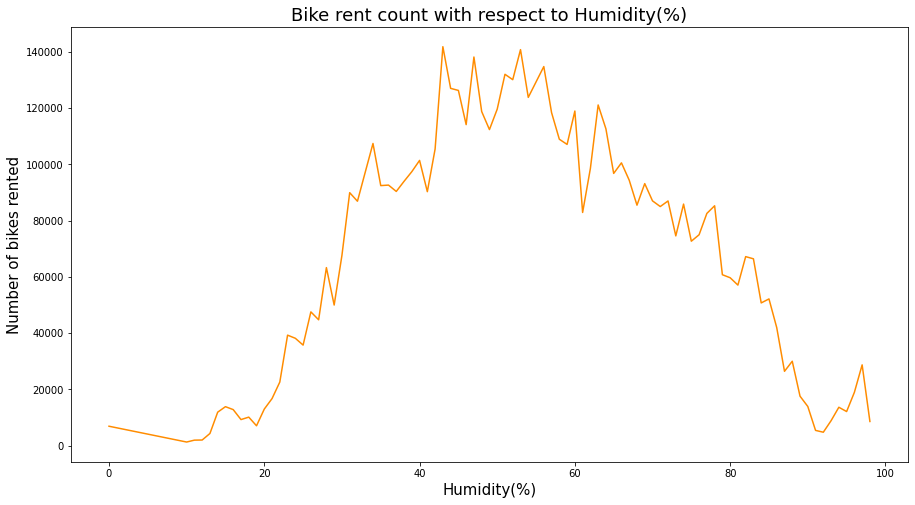

In [ ]:
# Creating data set which has all features grouped by accordind to humidity
humid_eda= bike_df.groupby(['humidity' ]).sum()


# Plotting graph
humid_eda['rented_bike_count'].plot(kind='line',figsize=(15,8) , color='darkorange')
plt.title('Bike rent count with respect to Humidity(%)',fontsize=18)
plt.xlabel("Humidity(%)", fontsize= 15)
plt.ylabel("Number of bikes rented", fontsize= 15)


# Printing top 5 data points which are in acending order.
humid_eda[humid_eda.columns[0:1]].head()


In [ ]:
# Humidity at which max bikes were rented.
humid_eda= humid_eda.reset_index()
max_humid_rent= humid_eda['humidity'][humid_eda['rented_bike_count'].argmax()]
min_humid_rent= humid_eda['humidity'][humid_eda['rented_bike_count'].argmin()]
print('Humidity % at which maximum bikes were rented is: ',max_humid_rent  )
print('Humidity % at which minimum bikes were rented is: ',min_humid_rent )

Humidity % at which maximum bikes were rented is:  43
Humidity % at which minimum bikes were rented is:  10


Some insights:-
1. We can see only at an optimal Humidity percentage, maximum number of bikes were rented.
2. Most appropriate humidity percentage is between 30% to 80%.
3. Humidity at which maximum bikes were rented is 43%.
4. Humidity at which minimum bikes were rented is 10%.

## 15. Affect of Visibility on number of Bikes rented. 

,rented_bike_count
visibility,
27,83
33,33
34,24
38,98
53,65


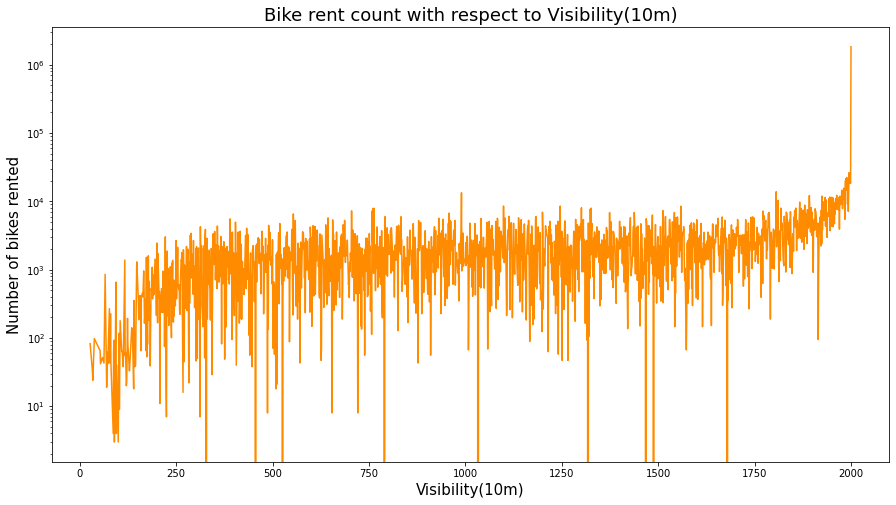

In [ ]:
# Creating data set which has all features grouped by accordind to Visibility(*10m)
visib_eda= bike_df.groupby(['visibility' ]).sum()


# Plotting graph
visib_eda['rented_bike_count'].plot(kind='line',figsize=(15,8) , color='darkorange')
plt.title('Bike rent count with respect to Visibility(10m)',fontsize=18)
plt.yscale("log")
plt.xlabel("Visibility(10m)", fontsize= 15)
plt.ylabel("Number of bikes rented", fontsize= 15)


# Printing top 5 data points which are in acending order.
visib_eda[visib_eda.columns[0:1]].head()


In [ ]:
# Visibility at which max bikes were rented.
visib_eda= visib_eda.reset_index()
max_visib_rent= visib_eda['visibility'][visib_eda['rented_bike_count'].argmax()]
min_visib_rent= visib_eda['visibility'][visib_eda['rented_bike_count'].argmin()]
print('Visibility % at which maximum bikes were rented is: ',max_visib_rent  )
print('Visibility % at which minimum bikes were rented is: ',min_visib_rent )

Visibility % at which maximum bikes were rented is:  2000
Visibility % at which minimum bikes were rented is:  328


Some insights:-
1. We can see as the visibility increases so the number of bike which are rented.
2. Visibility at which maximum bikes were rented is 20000 Meters

## 16. Affect of Wind speed on Number of bike rented.

,rented_bike_count
wind_speed,
0.0,33154
0.1,28961
0.2,42829
0.3,71869
0.4,87556


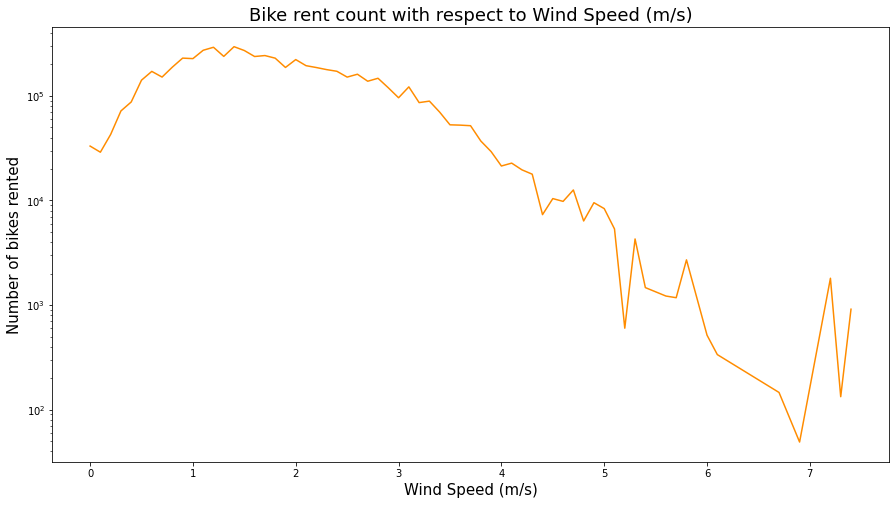

In [ ]:
# Creating data set which has all features grouped by accordind to Wind Speed (m/s)
wind_eda= bike_df.groupby(['wind_speed' ]).sum()


# Plotting graph
wind_eda['rented_bike_count'].plot(kind='line',figsize=(15,8) , color='darkorange')
plt.title('Bike rent count with respect to Wind Speed (m/s)',fontsize=18)
plt.yscale("log")
plt.xlabel("Wind Speed (m/s)", fontsize= 15)
plt.ylabel("Number of bikes rented", fontsize= 15)


# Printing top 5 data points which are in acending order.
wind_eda[wind_eda.columns[0:1]].head()


In [ ]:
# Visibility at which max bikes were rented.
wind_eda= wind_eda.reset_index()
max_wind_rent= wind_eda['wind_speed'][wind_eda['rented_bike_count'].argmax()]
min_wind_rent= wind_eda['wind_speed'][wind_eda['rented_bike_count'].argmin()]
print('Wind Speed(m/s) at which maximum bikes were rented is: ',max_wind_rent  )
print('Wind Speed(m/s) at which minimum bikes were rented is: ',min_wind_rent )

Wind Speed(m/s) at which maximum bikes were rented is:  1.4
Wind Speed(m/s) at which minimum bikes were rented is:  6.9


Some insights:-
1. We can see as the Wind Speed(m/s) increases the number of bike which are rented decreases.
2. Wind Speed(m/s) at which maximum bikes were rented is 1.4 m/s.
3. Wind Speed(m/s) at which minimum bikes were rented is 6.9 m/s.

## 17. Bike rent count on holidays vs Non-holidays

,rented_bike_count
holiday,
Holiday,215895
No Holiday,5956419


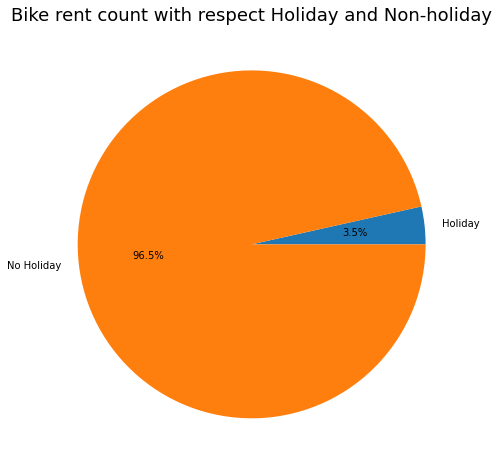

In [ ]:
# Creating data set which has all features grouped by accordind to Wind Speed (m/s)
holiday_eda= bike_df.groupby(['holiday' ]).sum()


# # Plotting graph
holiday_eda['rented_bike_count'].plot(kind='pie',figsize=(15,8), autopct='%1.1f%%')
plt.title('Bike rent count with respect Holiday and Non-holiday',fontsize=18)
plt.ylabel(" ", fontsize= 15)


# Printing top 5 data points which are in acending order.
holiday_eda[holiday_eda.columns[0:1]].head()


Some Insights:-
1. We have only 3.5% of total rented bikes count on Holiday, majority of bikes were rented on working days(not-holiday).

## 18. Rented bike count on each day of a week

,rented_bike_count
day_of_week,
Friday,950334
Monday,911743
Saturday,885492
Sunday,780194
Thursday,861999


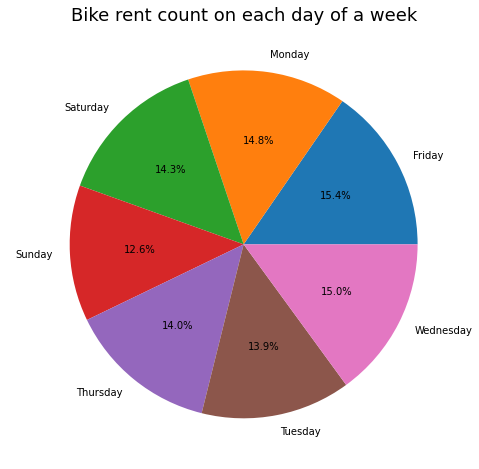

In [ ]:
# Creating data set which has all features grouped by accordind to Wind Speed (m/s)
day_of_week_eda= bike_df.groupby(['day_of_week']).sum()


# Plotting graph
day_of_week_eda['rented_bike_count'].plot(kind='pie',figsize=(15,8), autopct='%1.1f%%')
plt.title('Bike rent count on each day of a week',fontsize=18)
plt.ylabel(" ", fontsize= 15)


# Printing top 5 data points which are in acending order.
day_of_week_eda[day_of_week_eda.columns[0:1]].head()

Some Insights:-
1. Maximum bikes were rented on Friday(15.4%), On second place we have Wednesday(15.0%) and than Monday(14.8%).

# **DATA PREPRATION FOR MODEL TRAINING**

In [ ]:
bike_df.head()

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,season,holiday,functioning_day,year,month,day,day_of_week,weekend_or_not,weekendvsWeekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,1,Friday,0,weekdays
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,1,Friday,0,weekdays
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,1,Friday,0,weekdays
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,1,Friday,0,weekdays
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,December,1,Friday,0,weekdays


## 1. Deleting Unuseful data.

In [ ]:
# Droping columns which are not useful.

# Created a copy for easy working.
bike_df_lr= bike_df.copy(deep=True)

#Deleting columns 'date','year','day','day_of_week','weekend_or_not'.
bike_df_lr= bike_df_lr.drop(['date','year','day','day_of_week','weekend_or_not'], axis=1)




## 2. Encoding all Categorical Features.

In [ ]:
# Using One-hot encoding on followinf columns in the list

categorical_columns=['hour', 'season', 'holiday', 'functioning_day', 'month',
       'weekendvsWeekday']



def encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_columns:
    bike_df_lr = encoding(bike_df_lr, col)

bike_df_lr.head()

,rented_bike_count,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,hour_0,...,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,weekendvsWeekday_weekdays,weekendvsWeekday_weekends
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Checking all columns name in our current working dataset
bike_df_lr.columns

Index(['rented_bike_count', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall',
       'snowfall', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'season_Autumn',
       'season_Spring', 'season_Summer', 'season_Winter', 'holiday_Holiday',
       'holiday_No Holiday', 'functioning_day_No', 'functioning_day_Yes',
       'month_April', 'month_August', 'month_December', 'month_February',
       'month_January', 'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September',
       'weekendvsWeekday_weekdays', 'weekendvsWeekday_weekends'],
      dtype='object')

## 3. Dealing with outliers

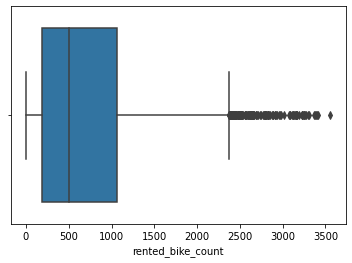

In [ ]:
# Checking for outliers in bike_rented_count, but we will do not remove it now, as we might be transforming out columns later which will help in dealing with outliers.
sns.boxplot(x='rented_bike_count', data= bike_df_lr)
plt.show()

Some Insights:-
1. we will be using square root transformation on it, and it will help in removing outliers, so we will not remove outliers in this way!

## 4. Analysing all Numeric columns

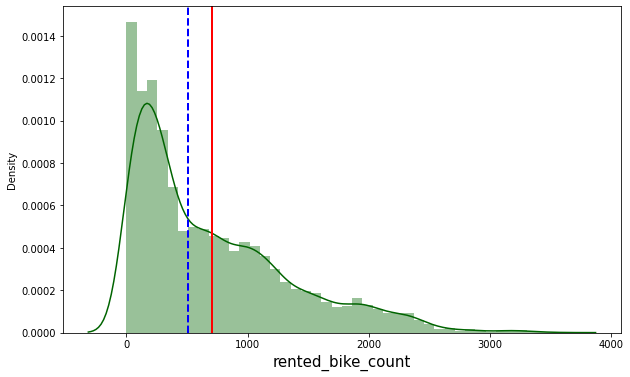

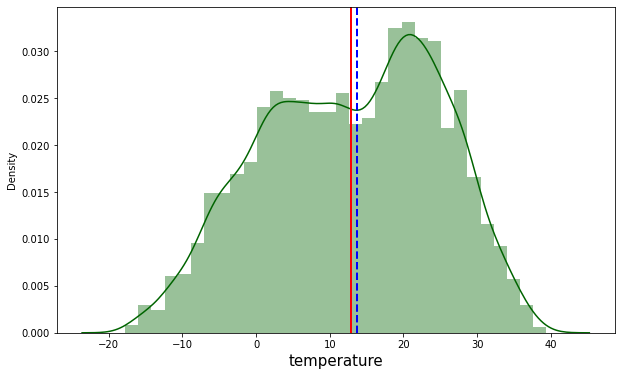

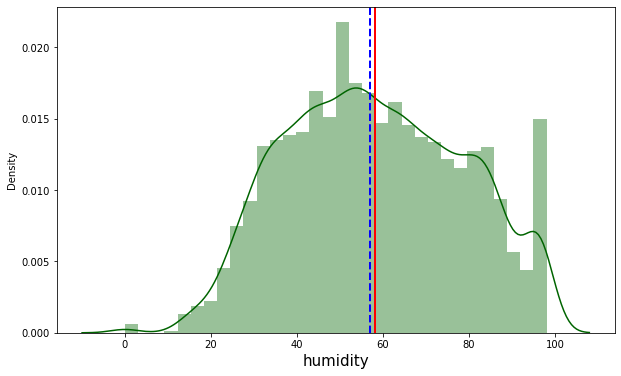

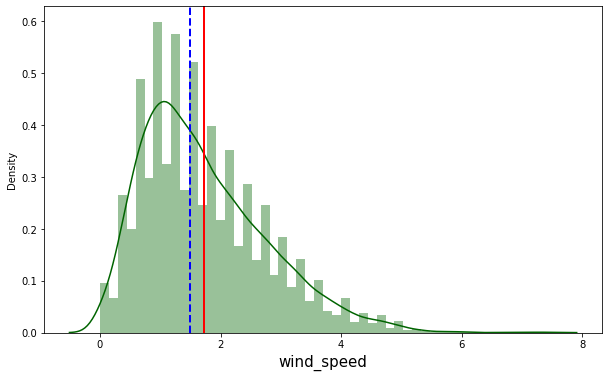

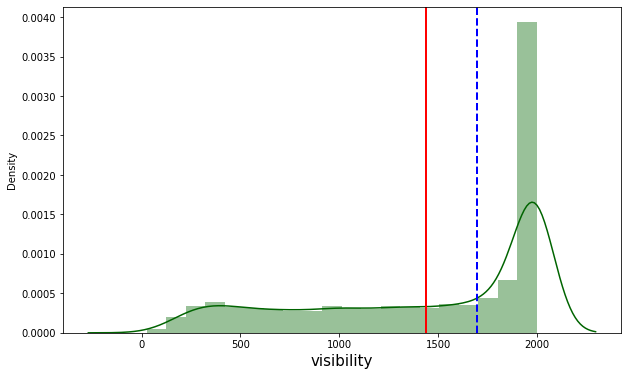

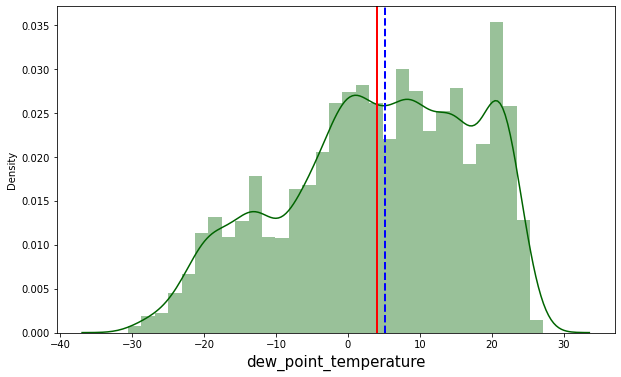

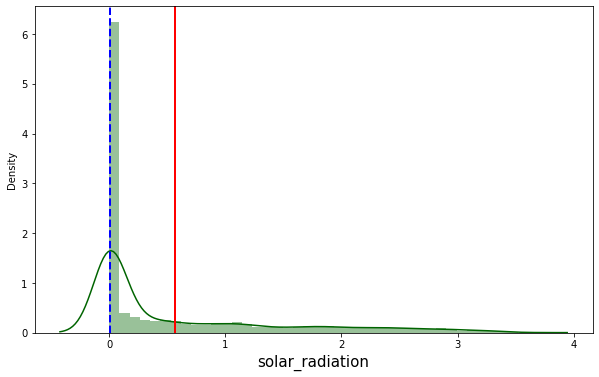

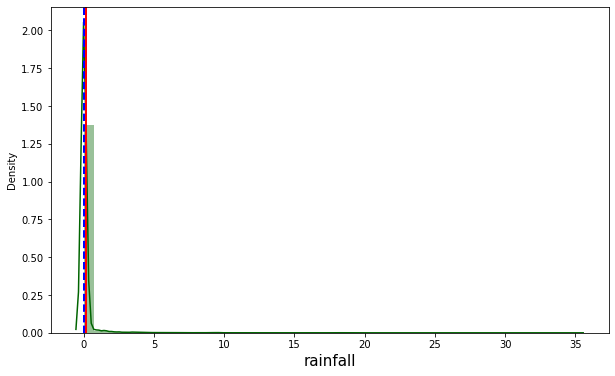

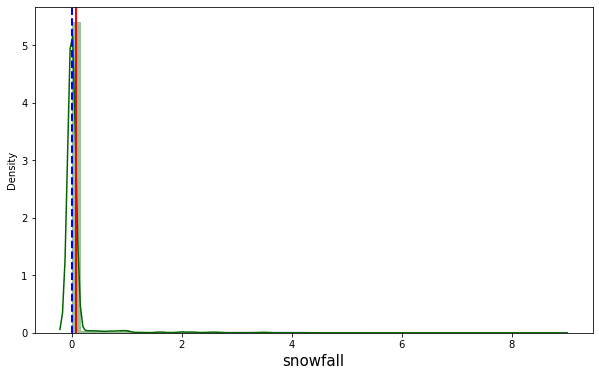

In [ ]:
# Creating a list of numeric columns

numeric_columns =['rented_bike_count', 'temperature', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall',
       'snowfall']


# PLotting displot of numeric features

for col in numeric_columns:
  plt.figure(figsize=(10,6))
  sns.distplot(x=bike_df_lr[col] , color ='darkgreen')
  plt.xlabel(col,fontsize= 15 )
  plt.axvline(bike_df_lr[col].mean(),color='red', linestyle='solid',linewidth=2)
  plt.axvline(bike_df_lr[col].median(),color='blue', linestyle='dashed',linewidth=2)
  plt.show()
plt.show()

Some Insights:- 
1. If mean is greater than median it means it is positively skewed
2. We can see many columns are skewed and for better model working we will transform some columns which are useful.

## 5. Regression plot for numeric features with bike rented count

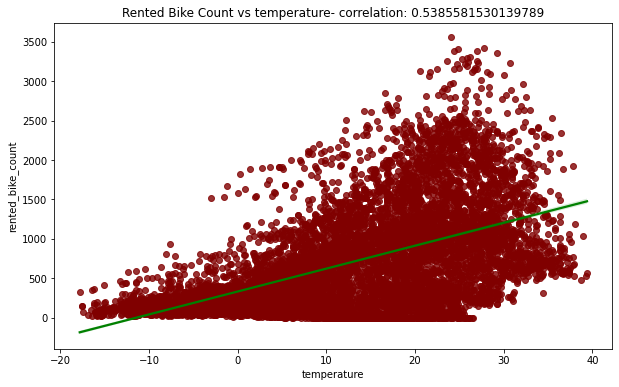

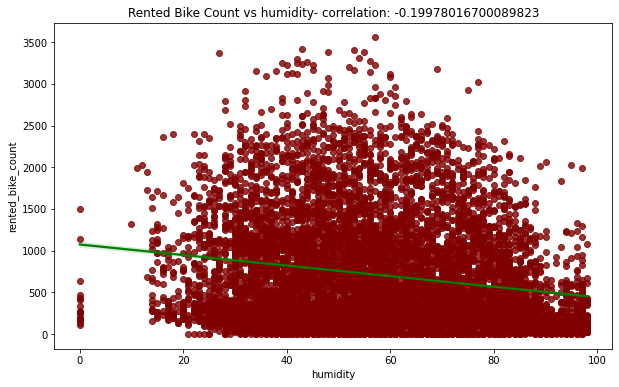

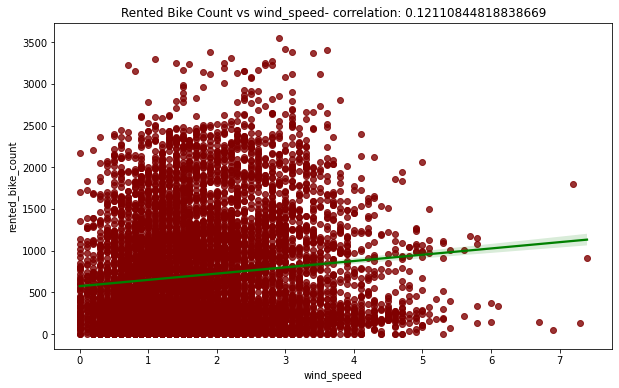

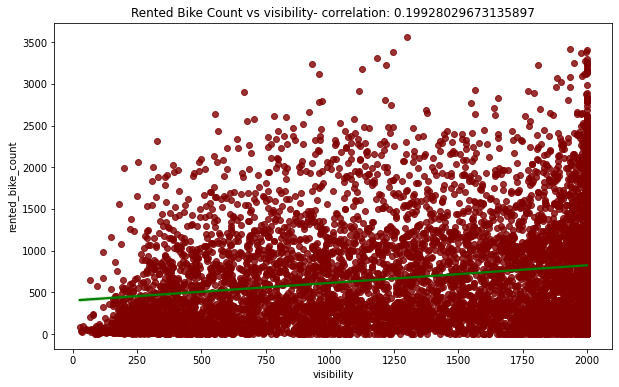

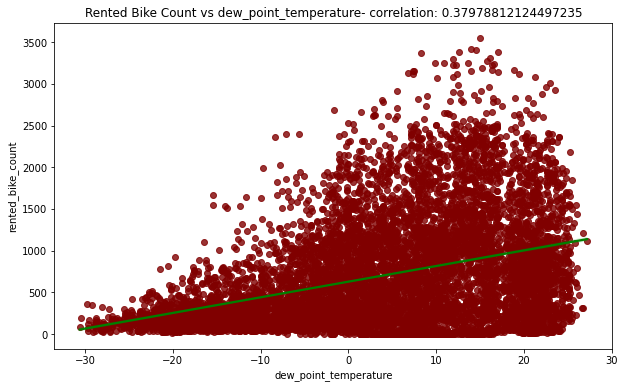

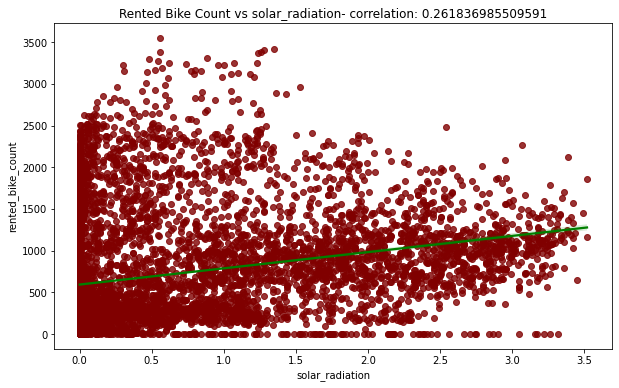

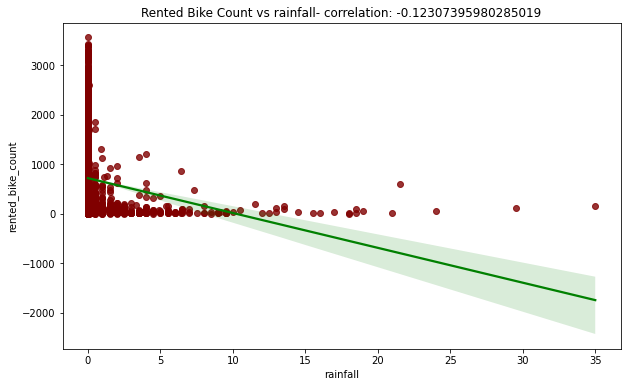

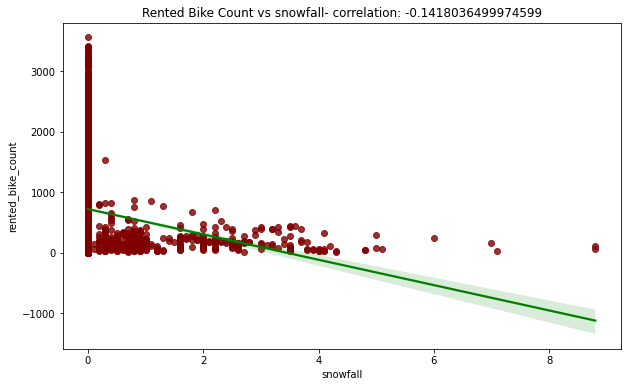

In [ ]:
# Plotting the regression plot for all the numerical features

# PLotting for all numeric columns except rented bike count as it is our dependent variable.
for col in numeric_columns[1:]:
  feature = bike_df_lr[col]
  label = bike_df_lr['rented_bike_count']
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=bike_df_lr[col],y=bike_df_lr['rented_bike_count'],scatter_kws={"color": 'maroon'}, line_kws={"color": "green"})
  correlation = feature.corr(label)

  ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))

Some Insights:-
1. All numeric COlumns are correlated to Rented bike count columns and most of them are positively and few are negatively.
2. Only snowfall, humidity and rainfall are negatively correlated.
3. Temperature and Dewpoint temperature are more correlated to rented_bike_count column.

## 6. Multicolleniarity check (VIF)


We will check for multicolleniarity and keep only 1 column of which are highly correlated to each other.

### Defining function to check VIF

In [ ]:
# Defining function to check VIF

def vif_calculator(X):
 
   # Calculating VIF
   vif_1 = pd.DataFrame()
   vif_1["variables"] = X.columns
   vif_1["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif_1)

### Checking VIF for all Independent numeric columns

In [ ]:
# Checking VIF for all Independent numeric columns
col_list_1=['temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall', 'snowfall']
vif_calculator(bike_df_lr[[i for i in bike_df_lr.describe().columns if i in col_list_1]])

,variables,VIF
0,temperature,29.075866
1,humidity,5.069743
2,wind_speed,4.517664
3,visibility,9.051931
4,dew_point_temperature,15.201989
5,solar_radiation,2.821604
6,rainfall,1.079919
7,snowfall,1.118903


Some insights:-
1. We see top VIF are of temperature and Dew_point_temperature, So we will drop dew point temperature as it is highest.



### Deleting required column.

In [ ]:
# Droping temperature

bike_df_lr= bike_df_lr.drop(['dew_point_temperature'], axis=1)

# Creating a new list after removing dew point temperature and adding rented_bike_count for further uses.
col_list_2=['rented_bike_count','temperature', 'humidity', 'wind_speed', 'visibility', 'solar_radiation', 'rainfall', 'snowfall']


### Final check for VIF

In [ ]:
# Rechecking VIF
vif_calculator(bike_df_lr[[i for i in bike_df_lr.describe().columns if i in col_list_1]])


,variables,VIF
0,temperature,3.166007
1,humidity,4.758651
2,wind_speed,4.079926
3,visibility,4.409448
4,solar_radiation,2.246238
5,rainfall,1.078501
6,snowfall,1.118901


Some insights:-
1. So now VIF is good, we moslty care about VIF which are above 5. 


## 7. Transforming data to get rid of skewness

### Checking all columns for skewness

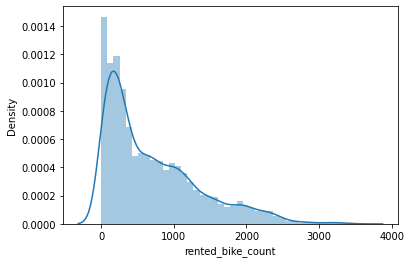

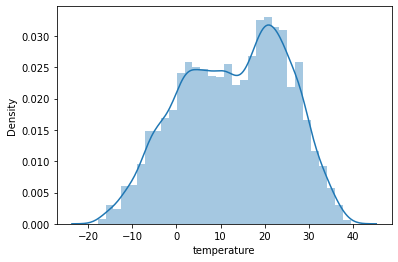

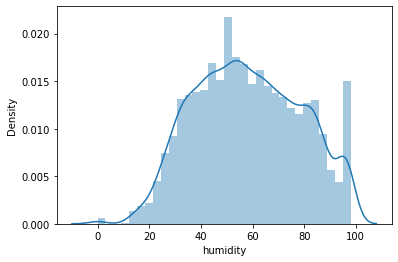

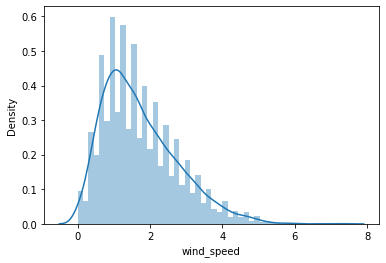

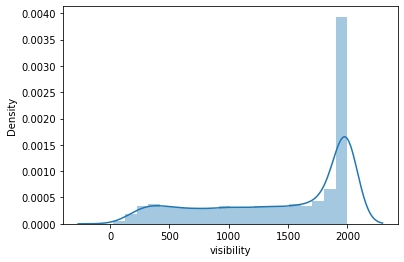

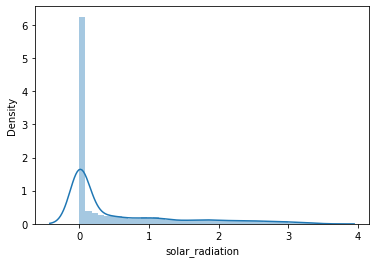

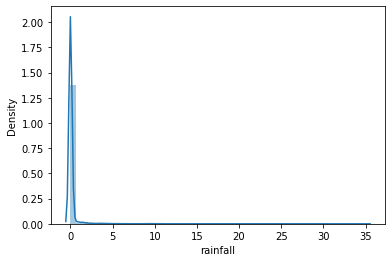

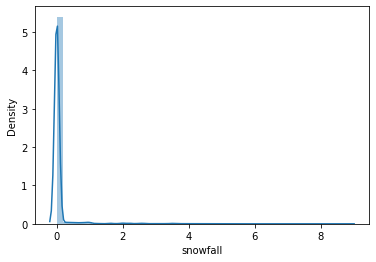

In [ ]:
# Checking all columns for skewness

dict1={}
for col in bike_df_lr[col_list_2]:
  dict1[col]=skew(bike_df_lr[col])
  

  plt.figure()
  sns.distplot(bike_df_lr[col])
  plt.show

Some Insights:-
1. We have skewness in many columns. now wee will apply squareroot transformation because it works better for our data set rather than log transformation.

### Applying squareroot Transformation on some columns which are important

In [ ]:
# Rented_bike_count is highly skewed so we are performing Squareroot transformation
bike_df_lr['rented_bike_count']=np.sqrt(bike_df_lr['rented_bike_count'])
print(bike_df_lr['rented_bike_count'].skew())

# wind is highly skewed so we are performing Squareroot transformation
bike_df_lr['wind_speed']=np.sqrt(bike_df_lr['wind_speed'])
print(bike_df_lr['wind_speed'].skew())

# solar radiation is highly skewed so we are performing Squareroot transformation
bike_df_lr['solar_radiation']=np.sqrt(bike_df_lr['solar_radiation'])
print(bike_df_lr['solar_radiation'].skew())

# Rainfall is highly skewed so we are performing Squareroot transformation
bike_df_lr['rainfall']=np.sqrt(bike_df_lr['rainfall'])
print(bike_df_lr['rainfall'].skew())

# Snowfall is highly skewed so we are performing Squareroot transformation
bike_df_lr['snowfall']=np.sqrt(bike_df_lr['snowfall'])
print(bike_df_lr['snowfall'].skew())


0.237362090985412
-0.005368836345296517
0.8075034623392892
6.6351459550336935
5.31480696909106


### Checking Skewness after the Squareroot transformation.

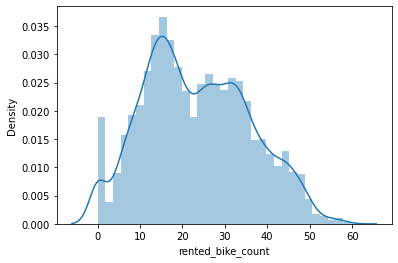

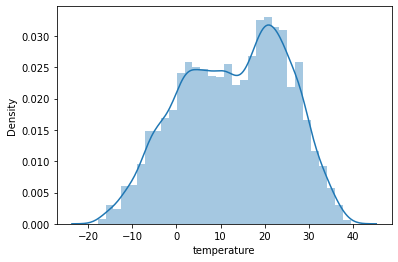

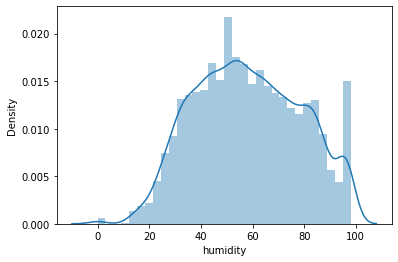

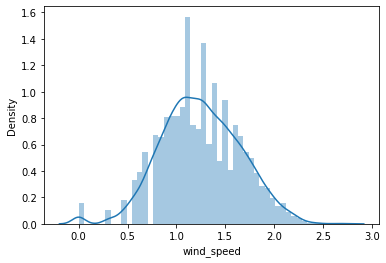

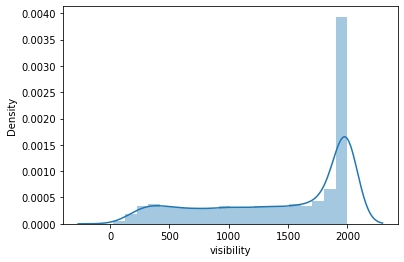

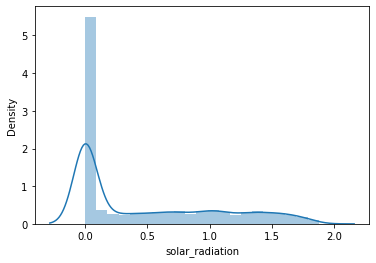

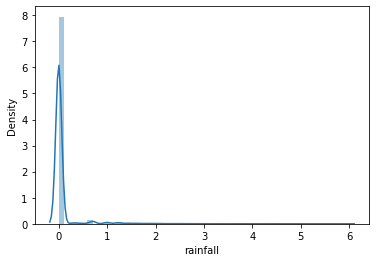

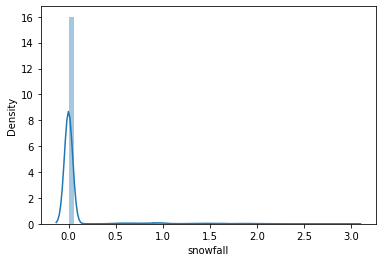

In [ ]:
# Putting new skewness value into dict2
dict2= {}
for col in bike_df_lr[col_list_2]:
  dict2[col]=skew(bike_df_lr[col])
  plt.figure()
  sns.distplot(bike_df_lr[col])
  plt.show

In [ ]:
# Skewness value before transformation
dict1

{'rented_bike_count': 1.1532306631480034,
 'temperature': -0.19829157303281608,
 'humidity': 0.059568770212928474,
 'wind_speed': 0.8908022300197548,
 'visibility': -0.7016662743215496,
 'solar_radiation': 1.5037821640619484,
 'rainfall': 14.530743557004502,
 'snowfall': 8.439355370132445}

In [ ]:
# Skewness value after transformation
dict2

{'rented_bike_count': 0.23732144485836718,
 'temperature': -0.19829157303281608,
 'humidity': 0.059568770212928474,
 'wind_speed': -0.005367916980273789,
 'visibility': -0.7016662743215496,
 'solar_radiation': 0.8073651846211284,
 'rainfall': 6.634009745859222,
 'snowfall': 5.313896856113931}

###

## Checking correlation between columns now


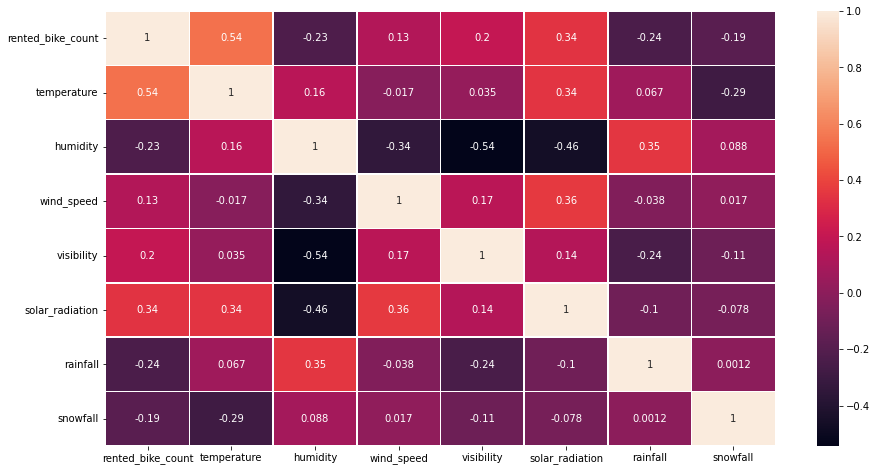

In [ ]:
# correlation graph of the data using heatmap

fig,ax = plt.subplots(figsize=(15,8))
sns.heatmap(bike_df_lr[col_list_2].corr(), annot=True, linewidths=.5)
plt.show()

## Final check for outliers now.

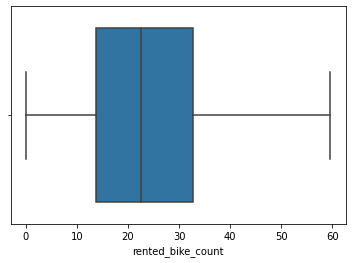

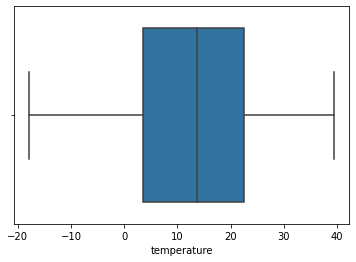

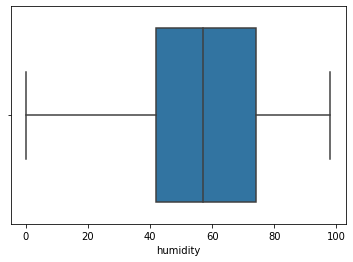

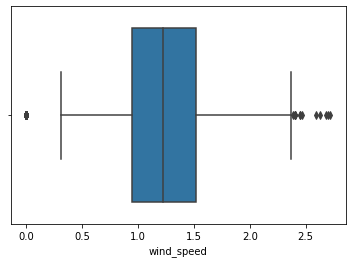

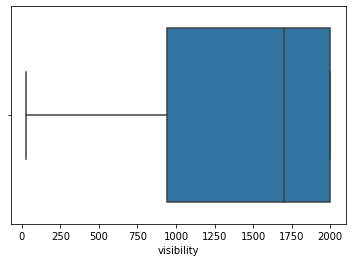

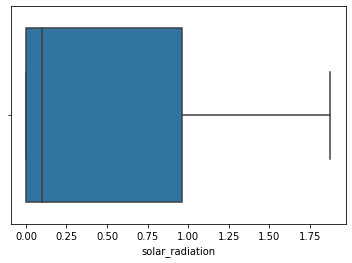

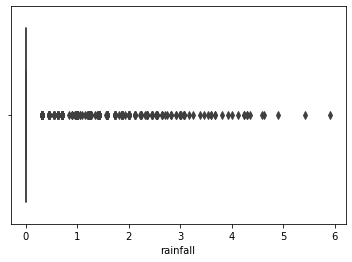

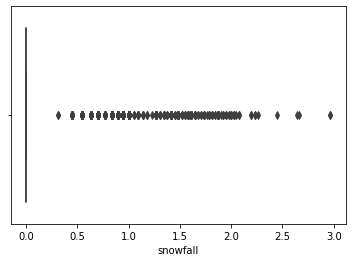

In [ ]:
# Random check for outliers
for col in col_list_2:
  sns.boxplot(x=col, data= bike_df_lr)
  ax.set_xlabel(col,fontsize=15)
  plt.show()


Some Insights:-
1. So we do not have any such outliers in our more correlated columns.
2. No outliers in out renter_bike_count columns, which is good.